<a href="https://colab.research.google.com/github/boyu571/kpc_lecture_notes/blob/master/ABC%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
########  Step.01  ########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

# from google.colab import files
# myfile = files.upload()

Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
########  Step.02  ########
#파일 종류 설정 (read_excel or read_csv)
df = pd.read_csv('C1_data.csv', index_col=0)
df

,대구,부산,광주,마산
월 물동량,23800,37640.0,15800.0,11000.0
지입차량대수,35,40.0,18.0,8.0
지입료(원/대),3200000,3300000.0,3100000.0,3500000.0
운행거리(km),2450,2100.0,2750.0,1700.0
연비(km),5,4.5,3.8,2.3
유류 단가(원/ ℓ),1100,1100.0,1120.0,1100.0
평균통행료(원),29000,32000.0,30000.0,33000.0
용차단가(원/회),170000,120000.0,95000.0,80000.0
용차사용수(회),80,200.0,30.0,35.0
하역 인원 (명),15,25.0,12.0,10.0


In [4]:
# 전치(transpose)해서 도시 기준으로 계산 가능하게 만들기
df_t = df.T.copy()

# Step 1: 기본 원가 관련 항목 계산
df_t["운송료"] = df_t["지입차량대수"] * df_t["지입료(원/대)"]
df_t["유류비"] = df_t["지입차량대수"] * df_t["운행거리(km)"] / df_t["연비(km)"] * df_t["유류 단가(원/ ℓ)"]
df_t["용차비"] = df_t["용차사용수(회)"] * df_t["용차단가(원/회)"]
df_t["이외"] = df_t["지입차량대수"] * df_t["평균통행료(원)"]

# 인건비, 지게차, 임차료
df_t["인건비"] = df_t["하역 인원 (명)"] * df_t["하역 인당 인건비(원/인,월)"]
df_t["지게차"] = df_t["지게차 대수"] * df_t["대당 지게차 유지비"]
df_t["임차료"] = df_t["보관CAPA(PLT)"] * df_t["평당 임차료"]

# 총비용: 운송+유류+용차+이외+인건비+지게차+임차료
df_t["총비용"] = df_t[["운송료", "유류비", "용차비", "이외", "인건비", "지게차", "임차료"]].sum(axis=1)

df_t

,월 물동량,지입차량대수,지입료(원/대),운행거리(km),연비(km),유류 단가(원/ ℓ),평균통행료(원),용차단가(원/회),용차사용수(회),하역 인원 (명),...,차량적재량(PLT),PLT당 적재량(박스),운송료,유류비,용차비,이외,인건비,지게차,임차료,총비용
대구,23800.0,35.0,3200000.0,2450.0,5.0,1100.0,29000.0,170000.0,80.0,15.0,...,5.0,40.0,112000000.0,1.886500e+07,13600000.0,1015000.0,30000000.0,6000000.0,224000000.0,4.054800e+08
부산,37640.0,40.0,3300000.0,2100.0,4.5,1100.0,32000.0,120000.0,200.0,25.0,...,5.0,40.0,132000000.0,2.053333e+07,24000000.0,1280000.0,43750000.0,8400000.0,228000000.0,4.579633e+08
광주,15800.0,18.0,3100000.0,2750.0,3.8,1120.0,30000.0,95000.0,30.0,12.0,...,5.0,40.0,55800000.0,1.458947e+07,2850000.0,540000.0,20400000.0,3200000.0,137500000.0,2.348795e+08
마산,11000.0,8.0,3500000.0,1700.0,2.3,1100.0,33000.0,80000.0,35.0,10.0,...,5.0,40.0,28000000.0,6.504348e+06,2800000.0,264000.0,18500000.0,3000000.0,60000000.0,1.190683e+08


In [5]:
# Step 2: 원단위 및 물류 효율 지표 계산

df_t["대당 원단위"] = df_t["지입료(원/대)"] + df_t["운행거리(km)"] / df_t["연비(km)"] * df_t["유류 단가(원/ ℓ)"] + df_t["평균통행료(원)"]
df_t["배송처당 원단위"] = df_t["대당 원단위"] / df_t["평균 배송처"]
df_t["회전율"] = df_t["월 물동량"] / (df_t["지입차량대수"] * df_t["차량적재량(PLT)"] * df_t["PLT당 적재량(박스)"])
df_t["거래처별 평균배송량(박스)"] = df_t["월 물동량"] / df_t["평균 배송처"]
df_t["용차 비중"] = df_t["용차사용수(회)"] / df_t["총 차량운행대수"]
df_t["인당"] = df_t["월 물동량"] / df_t["하역 인원 (명)"]
df_t["지게차(PLT당)"] = df_t["월 물동량"] / df_t["지게차 대수"]
df_t["보관율"] = df_t["일평균 재고량(PLT)"] / df_t["보관CAPA(PLT)"]

df_t

,월 물동량,지입차량대수,지입료(원/대),운행거리(km),연비(km),유류 단가(원/ ℓ),평균통행료(원),용차단가(원/회),용차사용수(회),하역 인원 (명),...,임차료,총비용,대당 원단위,배송처당 원단위,회전율,거래처별 평균배송량(박스),용차 비중,인당,지게차(PLT당),보관율
대구,23800.0,35.0,3200000.0,2450.0,5.0,1100.0,29000.0,170000.0,80.0,15.0,...,224000000.0,4.054800e+08,3.768000e+06,7850.000000,3.400000,49.583333,0.102564,1586.666667,2975.000000,0.392857
부산,37640.0,40.0,3300000.0,2100.0,4.5,1100.0,32000.0,120000.0,200.0,25.0,...,228000000.0,4.579633e+08,3.845333e+06,5340.740741,4.705000,52.277778,0.200000,1505.600000,3136.666667,0.733333
광주,15800.0,18.0,3100000.0,2750.0,3.8,1120.0,30000.0,95000.0,30.0,12.0,...,137500000.0,2.348795e+08,3.940526e+06,11589.783282,4.388889,46.470588,0.076923,1316.666667,3950.000000,0.760000
마산,11000.0,8.0,3500000.0,1700.0,2.3,1100.0,33000.0,80000.0,35.0,10.0,...,60000000.0,1.190683e+08,4.346043e+06,18108.514493,6.875000,45.833333,0.179487,1100.000000,3666.666667,0.666667


In [6]:
# Step 3: 마산 물류센터 이관 가정 (4:4:2 비율 분배)
allocation_ratio = {"대구": 0.4, "부산": 0.4, "광주": 0.2}
columns_to_allocate = ["월 물동량", "평균 배송처", "운행거리(km)", "지입차량대수", "하역 인원 (명)", "지게차 대수", "용차사용수(회)"]
masan_data = df_t.loc["마산", columns_to_allocate]

# 각 항목에 대해 TO-BE 열 추가
for col in columns_to_allocate:
    for center in allocation_ratio:
        df_t.loc[center, f"{col}_TOBE"] = round(df_t.loc[center, col] + masan_data[col] * allocation_ratio[center])

df_t

,월 물동량,지입차량대수,지입료(원/대),운행거리(km),연비(km),유류 단가(원/ ℓ),평균통행료(원),용차단가(원/회),용차사용수(회),하역 인원 (명),...,인당,지게차(PLT당),보관율,월 물동량_TOBE,평균 배송처_TOBE,운행거리(km)_TOBE,지입차량대수_TOBE,하역 인원 (명)_TOBE,지게차 대수_TOBE,용차사용수(회)_TOBE
대구,23800.0,35.0,3200000.0,2450.0,5.0,1100.0,29000.0,170000.0,80.0,15.0,...,1586.666667,2975.000000,0.392857,28200.0,576.0,3130.0,38.0,19.0,9.0,94.0
부산,37640.0,40.0,3300000.0,2100.0,4.5,1100.0,32000.0,120000.0,200.0,25.0,...,1505.600000,3136.666667,0.733333,42040.0,816.0,2780.0,43.0,29.0,13.0,214.0
광주,15800.0,18.0,3100000.0,2750.0,3.8,1120.0,30000.0,95000.0,30.0,12.0,...,1316.666667,3950.000000,0.760000,18000.0,388.0,3090.0,20.0,14.0,5.0,37.0
마산,11000.0,8.0,3500000.0,1700.0,2.3,1100.0,33000.0,80000.0,35.0,10.0,...,1100.000000,3666.666667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Step 3: TO-BE 비용 계산 (마산 제외하고 전체 연산하되 마산은 NaN 유지)
city = df_t.index != "마산"

# 운송료, 유류비, 용차비, 이외
df_t.loc[city, "운송료_TOBE"] = df_t["지입차량대수_TOBE"] * df_t["지입료(원/대)"]
df_t.loc[city, "유류비_TOBE"] = (
    df_t["지입차량대수_TOBE"] * df_t["운행거리(km)_TOBE"] / df_t["연비(km)"] * df_t["유류 단가(원/ ℓ)"]
)
df_t.loc[city, "용차비_TOBE"] = df_t["용차사용수(회)_TOBE"] * df_t["용차단가(원/회)"]
df_t.loc[city, "이외_TOBE"] = df_t["지입차량대수_TOBE"] * df_t["평균통행료(원)"]

# 인건비, 지게차, 임차료
df_t.loc[city, "인건비_TOBE"] = df_t["하역 인원 (명)_TOBE"] * df_t["하역 인당 인건비(원/인,월)"]
df_t.loc[city, "지게차_TOBE"] = df_t["지게차 대수_TOBE"] * df_t["대당 지게차 유지비"]
df_t.loc[city, "임차료_TOBE"] = df_t["보관CAPA(PLT)"] * df_t["평당 임차료"]

# 이전비용 열 추가 (대구, 부산, 광주: 36,000,000 / 마산: 0)
df_t["이전비용"] = 0
df_t.loc[["대구", "부산", "광주"], "이전비용"] = 36_000_000

# 총비용 계산 (이전비용 포함)
df_t["총비용_TOBE"] = df_t[[
    "운송료_TOBE", "유류비_TOBE", "용차비_TOBE", "이외_TOBE",
    "인건비_TOBE", "지게차_TOBE", "임차료_TOBE", "이전비용"
]].sum(axis=1)

df_t

,월 물동량,지입차량대수,지입료(원/대),운행거리(km),연비(km),유류 단가(원/ ℓ),평균통행료(원),용차단가(원/회),용차사용수(회),하역 인원 (명),...,용차사용수(회)_TOBE,운송료_TOBE,유류비_TOBE,용차비_TOBE,이외_TOBE,인건비_TOBE,지게차_TOBE,임차료_TOBE,이전비용,총비용_TOBE
대구,23800.0,35.0,3200000.0,2450.0,5.0,1100.0,29000.0,170000.0,80.0,15.0,...,94.0,121600000.0,2.616680e+07,15980000.0,1102000.0,38000000.0,6750000.0,224000000.0,36000000,4.695988e+08
부산,37640.0,40.0,3300000.0,2100.0,4.5,1100.0,32000.0,120000.0,200.0,25.0,...,214.0,141900000.0,2.922089e+07,25680000.0,1376000.0,50750000.0,9100000.0,228000000.0,36000000,5.220269e+08
광주,15800.0,18.0,3100000.0,2750.0,3.8,1120.0,30000.0,95000.0,30.0,12.0,...,37.0,62000000.0,1.821474e+07,3515000.0,600000.0,23800000.0,4000000.0,137500000.0,36000000,2.856297e+08
마산,11000.0,8.0,3500000.0,1700.0,2.3,1100.0,33000.0,80000.0,35.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00


In [8]:
# 소수점 2자리, 지수표기 비활성화
pd.options.display.float_format = '{:,.0f}'.format

# 총비용과 총비용_TOBE 열만 추출
final_df = df_t[["총비용", "총비용_TOBE"]].copy()
final_df

# 합계 행 추가
final_df.loc["Total"] = final_df.sum()
final_df

,총비용,총비용_TOBE
대구,"405,480,000","469,598,800"
부산,"457,963,333","522,026,889"
광주,"234,879,474","285,629,737"
마산,"119,068,348",0
Total,"1,217,391,155","1,277,255,426"


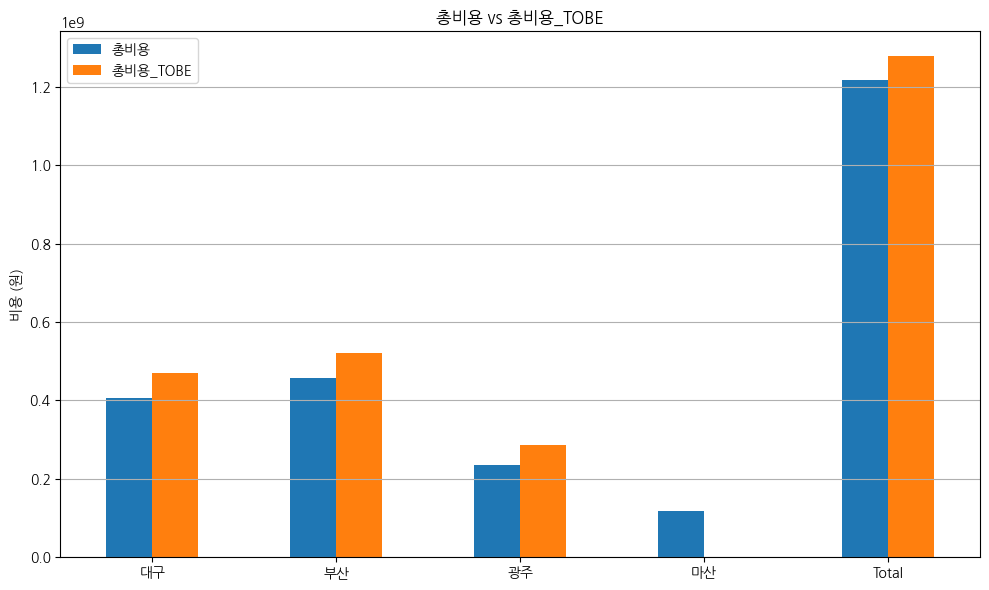

In [9]:
# 총비용 비교 바 차트
final_df[["총비용", "총비용_TOBE"]].dropna().plot(
    kind="bar",
    figsize=(10, 6),
    title="총비용 vs 총비용_TOBE",
    rot=0
)
plt.ylabel("비용 (원)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19536\1637265684.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_compare, x="항목", y="비용", hue="비용_종류", ci=None, errorbar=None)


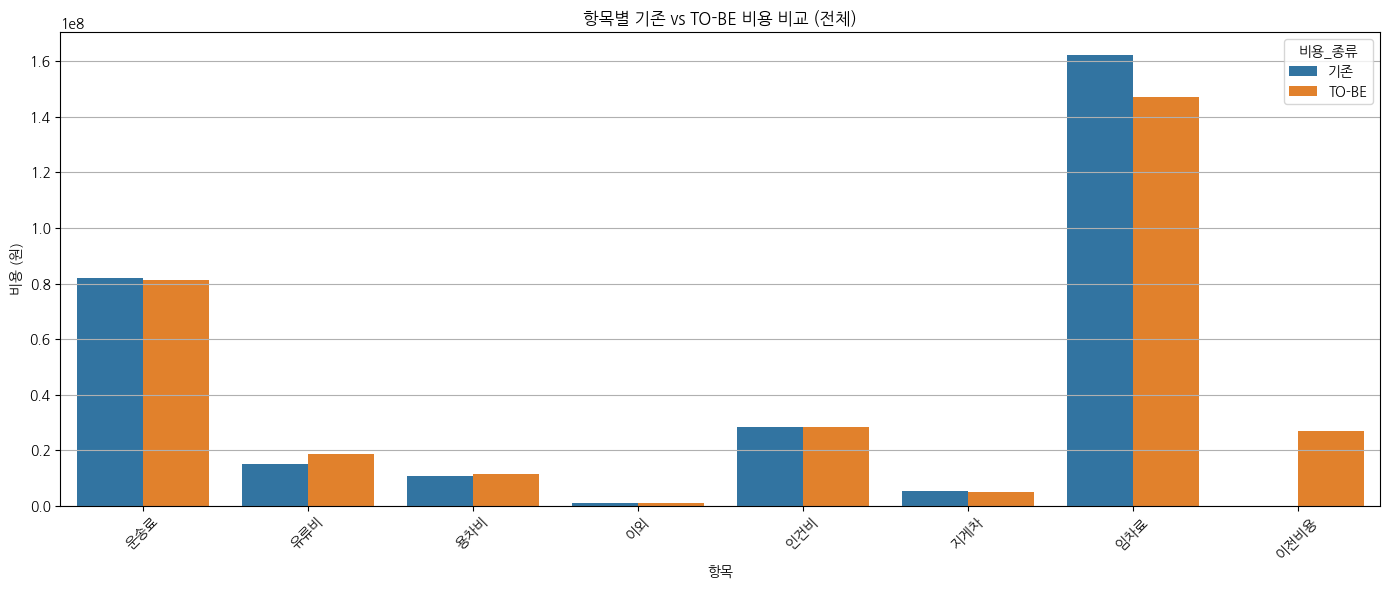

In [12]:
# 항목 목록 (이전비용 포함)
항목들 = ["운송료", "유류비", "용차비", "이외", "인건비", "지게차", "임차료", "이전비용"]

# 기존/TO-BE 비교용 데이터 재구성
comparison_data = []

for 항목 in 항목들:
    for 도시 in df_t.index:
        # '이전비용'은 TO-BE에만 존재
        if 항목 == "이전비용":
            tobe비용 = df_t.loc[도시, 항목] if 항목 in df_t.columns and not pd.isna(df_t.loc[도시, 항목]) else 0
            comparison_data.append({
                "도시": 도시,
                "항목": 항목,
                "비용_종류": "TO-BE",
                "비용": tobe비용
            })
        else:
            기존비용 = df_t.loc[도시, 항목] if 항목 in df_t.columns and not pd.isna(df_t.loc[도시, 항목]) else 0
            tobe_col = f"{항목}_TOBE"
            tobe비용 = df_t.loc[도시, tobe_col] if tobe_col in df_t.columns and not pd.isna(df_t.loc[도시, tobe_col]) else 0
            comparison_data.append({
                "도시": 도시,
                "항목": 항목,
                "비용_종류": "기존",
                "비용": 기존비용
            })
            comparison_data.append({
                "도시": 도시,
                "항목": 항목,
                "비용_종류": "TO-BE",
                "비용": tobe비용
            })

df_compare = pd.DataFrame(comparison_data)

# 시각화
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(data=df_compare, x="항목", y="비용", hue="비용_종류", ci=None, errorbar=None)
plt.title("항목별 기존 vs TO-BE 비용 비교 (전체)")
plt.ylabel("비용 (원)")
plt.xlabel("항목")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
